In [1]:
#basic package import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
from hashlib import sha256
import enchant
import nltk

In [2]:
true_1 = pd.read_csv("D:\\MS Business Analytics – University of Cincinnati\\Classroom Notes and Exercises\\IS 6070 - Survey of Machine Learning\\Final project - NLP\\News_Dataset\\True.csv")
fake_1 = pd.read_csv("D:\\MS Business Analytics – University of Cincinnati\\Classroom Notes and Exercises\\IS 6070 - Survey of Machine Learning\Final project - NLP\\News_Dataset\\Fake.csv")

D:\InstalledConda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.



Taking only the relevant columns for our analysis

In [3]:
fake = fake_1[["title", "text", "subject"]]
true = true_1[["title" , "text", "subject"]]

In [4]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49403 entries, 0 to 49402
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48671 non-null  object
 1   text     31748 non-null  object
 2   subject  49403 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [95]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68747 entries, 0 to 68746
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44255 non-null  object
 1   text     51877 non-null  object
 2   subject  29289 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [6]:
print(len(true),len(fake))

49403 68747


Creating another column for fake and real news

In [5]:
true['category'] = 1
fake['category'] = 0

<ipython-input-5-e55b85947270>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
#overview of data frame
true.head()
fake.head()

,title,text,subject,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [8]:
true.isna().sum()

title         732
text        17655
subject         0
category        0
dtype: int64

In [9]:
fake.isna().sum()

title       24492
text        16870
subject     39458
category        0
dtype: int64

Deleting rows where text is NULL in both fake and real datasets

In [16]:
true = true.dropna(subset = ["text"])
true

,title,text,subject,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1
...,...,...,...,...
31783,Maine’s Gov. LePage Threatens To ‘Investigate’...,Google Pinterest Digg Linkedin Reddit Stumbleu...,gossip,1
31784,Lawyer Who Kept Hillary Campaign Chief Out of ...,Lawyer Who Kept Hillary Campaign Chief Out of ...,gossip,1
31785,Idiot Who Destroyed Trump Hollywood Star Gets ...,Share This \nAlthough the vandal who thought i...,gossip,1
31786,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",gossip,1


In [17]:
fake = fake.dropna(subset = ["text"])
fake

,title,text,subject,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
...,...,...,...,...
56132,"On an East Side Corner, a Christmas Tree Vendo...",As temperatures in New York City dip from cold...,NaN,0
56133,The World Is Full of Dogs Without Collars - Th...,"MONTAGUE, Mass. — Think of all the dogs out...",NaN,0
56134,A Big Test for Big Batteries - The New York Times,"ESCONDIDO, Calif. — In Southern California ...",NaN,0
56135,California Today: How Do Top Newspapers Line U...,Good morning. (Want to get California Today by...,NaN,0


Creating a combined dataframe

In [18]:
news = pd.concat([true, fake])
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83625 entries, 0 to 56136
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     63557 non-null  object
 1   text      83625 non-null  object
 2   subject   60984 non-null  object
 3   category  83625 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


Now, let's see the number of null values in respective columns

In [19]:
news.isna().sum()

title       20068
text            0
subject     22641
category        0
dtype: int64

In [20]:
news['text'] = news['text'].astype('str') + news['title'].astype('str')
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83625 entries, 0 to 56136
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     63557 non-null  object
 1   text      83625 non-null  object
 2   subject   60984 non-null  object
 3   category  83625 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


Removing the other 2 columns, and only taking the combined text, subject and category column

In [21]:
news1 = news[["text", "subject", "category"]]

In [22]:
news1.head()

,text,subject,category
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [23]:
# counting twitter related mentions
import re
def count_twitter_user(df):
    count=0
    reg_val=re.compile(r'@([A-Za-z0-9_]+)')
    
    for text in df['text']:
        count+=len(re.findall(reg_val,str(text)))
    
    return count

count_twitter_user(news1)

40090

In [24]:
true_count_twitter_user=count_twitter_user(true)
fake_count_twitter_user=count_twitter_user(fake)

In [27]:
fg=go.Figure()
fg.add_trace(go.Bar(x=['true_count_twitter_user','fake_count_twitter_user'],y=[true_count_twitter_user,fake_count_twitter_user],marker_color='green',name='Twitter related user mentions'))
fg.update_layout(
    title="Number of Twitter Mentions – by News",
    xaxis_title="Type of News",
    yaxis_title="Count of News",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"))

fg.show()

Creating word count column for each news text

In [29]:
def text_word_count(df):
    sizes=[]
    for text in df['text']:
        sizes.append(len(str(text).split()))
    return sizes

news_text_word_count=text_word_count(news1)

news1['word_count']=news_text_word_count
news1.head()

,text,subject,category,word_count
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,759
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,633
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,467
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,385
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,863


In [30]:
#merging true and fake data frames

# true['is_true']=1
# fake['is_true']=0
# concat=pd.concat([true,fake])
# concat.head()
# concat.tail()

In [31]:
#Box Plot of Word Count
fg=go.Figure()
fg.add_trace(go.Box(y=list(news1[news1['category']==1]['word_count']),marker_color='green',name='True'))
fg.add_trace(go.Box(y=list(news1[news1['category']==0]['word_count']),marker_color='red',name='False'))
fg.update_layout({'title':'Box Plot of Word Count '})
fg.show()

In [32]:
# finding duplicate news articles
def hash_calc(df):
    hash_list=[]
    for text in df['text']:
        hash_val=sha256(text.encode('utf-8')).hexdigest()
        hash_list.append(hash_val)
    df['hash']=hash_list
    df2=df.drop_duplicates('hash')
    return df2

In [34]:
# clearing the duplicate news articles
unique=hash_calc(news1)
print(len(unique))
#concat_unique=concat.drop_duplicates('hash')
#len(concat_unique)

76165


In [36]:
news1

,text,subject,category,word_count,hash
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,759,8c33be81f864e478b2e92b1434a0828f41c464d6ed1365...
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,633,cbb5312d02a4c5d105d0945b1b7bd23811bef7d7edb115...
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,467,56ce2a7e271eaa0af2baf805235716c8e570bf519911f1...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,385,484dd8e148e496ce4d2b1f237ca21c7314e840d3d8eae1...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,863,2be6541b64fb4f59dd3a32947f79efa9dd4ad474394989...
...,...,...,...,...,...
56132,As temperatures in New York City dip from cold...,NaN,0,857,49349df3d465ce402b957c441991f45f33cdaf82d444da...
56133,"MONTAGUE, Mass. — Think of all the dogs out...",NaN,0,2195,27f3fc4aaa016b91dde4cce6f0cfcb4d086a9ee3f80575...
56134,"ESCONDIDO, Calif. — In Southern California ...",NaN,0,2456,771fdd5918da9cad82329eb2fbe011b5cb6360abdf331e...
56135,Good morning. (Want to get California Today by...,NaN,0,1125,c765ebc42110af0299bb0db696e9571f497159ab87d393...


In [40]:
# Preprocessing starts here

def data_preprocess(df):
    stopwords=nltk.corpus.stopwords.words('english')
    df['text_pre']=df['text']
    df['text_pre']=df['text_pre'].apply(lambda x:x.lower().split(" "))
    df['text_pre']=df['text_pre'].apply(lambda x:" ".join([item for item in x if item not in stopwords]))
    
    
    df['text_pre'] = df['text_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    df['text_pre'] = df['text_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['text_pre'] = df['text_pre'].str.replace('\d+', '')
    df['text_pre'] = df['text_pre'].str.replace('[^\w\s]', '')
    return df
    

processed_news=data_preprocess(news1)
processed_news.head()

,text,subject,category,word_count,hash,text_pre
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,759,8c33be81f864e478b2e92b1434a0828f41c464d6ed1365...,washington reuters head conservative republic...
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,633,cbb5312d02a4c5d105d0945b1b7bd23811bef7d7edb115...,washington reuters transgender people allowed...
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,467,56ce2a7e271eaa0af2baf805235716c8e570bf519911f1...,washington reuters special counsel investigat...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,385,484dd8e148e496ce4d2b1f237ca21c7314e840d3d8eae1...,washington reuters trump campaign adviser geo...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,863,2be6541b64fb4f59dd3a32947f79efa9dd4ad474394989...,seattlewashington reuters president donald tr...


In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

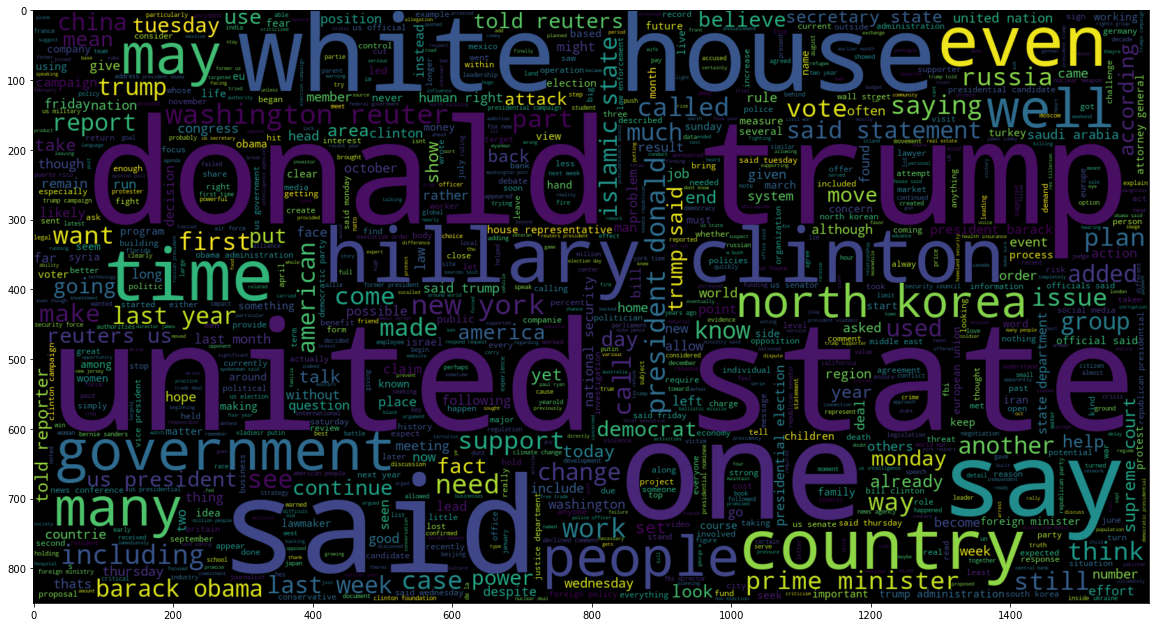

In [42]:
plt.figure(figsize = (20,20))
wordc = WordCloud(max_words = 1000, width = 1600, height = 850, stopwords = STOPWORDS).generate(" ".join(news1[news1.category== 1].text_pre))
plt.imshow(wordc, interpolation = 'bilinear')

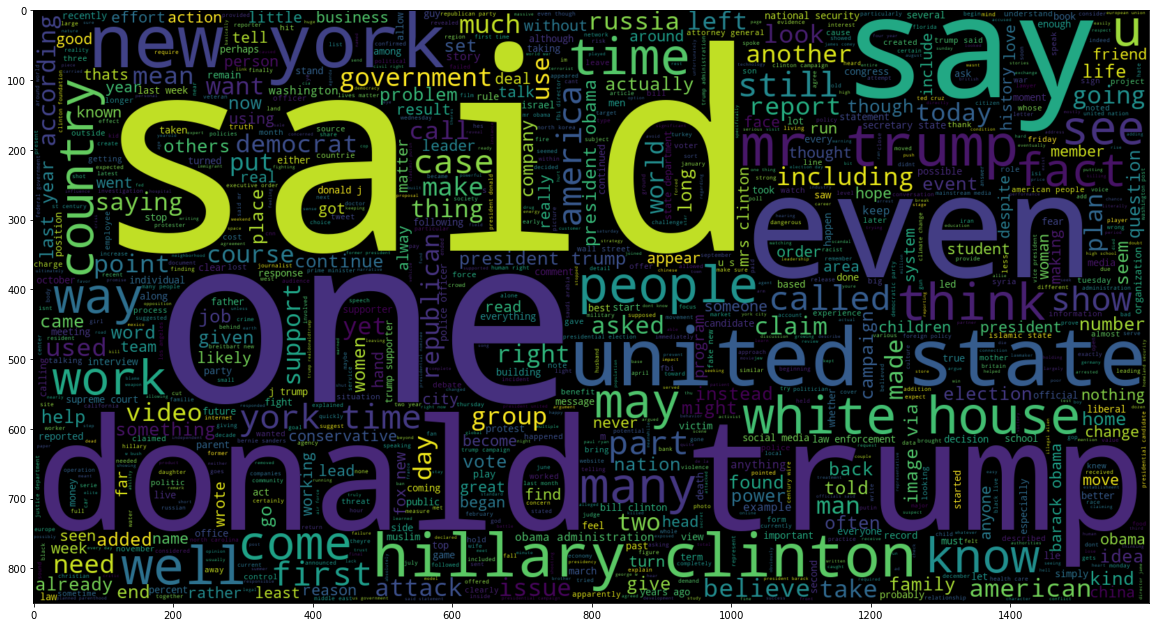

In [43]:
plt.figure(figsize = (20,20))
wordc = WordCloud(max_words = 1000, width = 1600, height = 850, stopwords = STOPWORDS).generate(" ".join(news1[news1.category== 0].text_pre))
plt.imshow(wordc, interpolation = 'bilinear')

Now, stemming the words, and store them into a new column

In [147]:
from nltk.stem import PorterStemmer

Number of characters we have in our text

Text(0.5, 1.0, 'Fake Data')

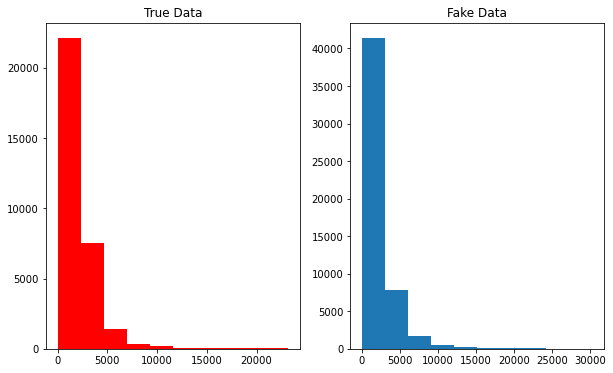

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
text_len_r = news1[news1['category'] == 1]['text_pre'].str.len()
ax1.hist(text_len_r, color = 'red')
ax1.set_title('True Data')
text_len_f = news1[news1['category'] == 0]['text_pre'].str.len()
ax2.hist(text_len_f)
ax2.set_title('Fake Data')

Let's see the number of words in each text

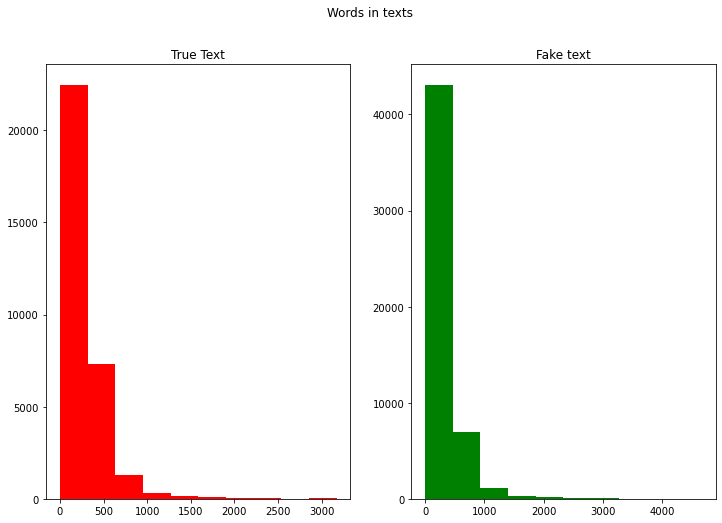

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len_1 = news1[news1['category'] == 1]['text_pre'].str.split().map(lambda x: len(x))
ax1.hist(text_len_1,color='red')
ax1.set_title('True Text')
text_len_2 = news1[news1['category'] == 0]['text_pre'].str.split().map(lambda x: len(x))
ax2.hist(text_len_2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

We can see that in true text, texts with less words are more common, when compared with fake news texts

D:\InstalledConda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

D:\InstalledConda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

D:\InstalledConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\InstalledConda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning:

Mean of empty slice.

D:\InstalledConda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

D:\InstalledConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-lev

Text(0.5, 0.98, 'Average length of words in each text')

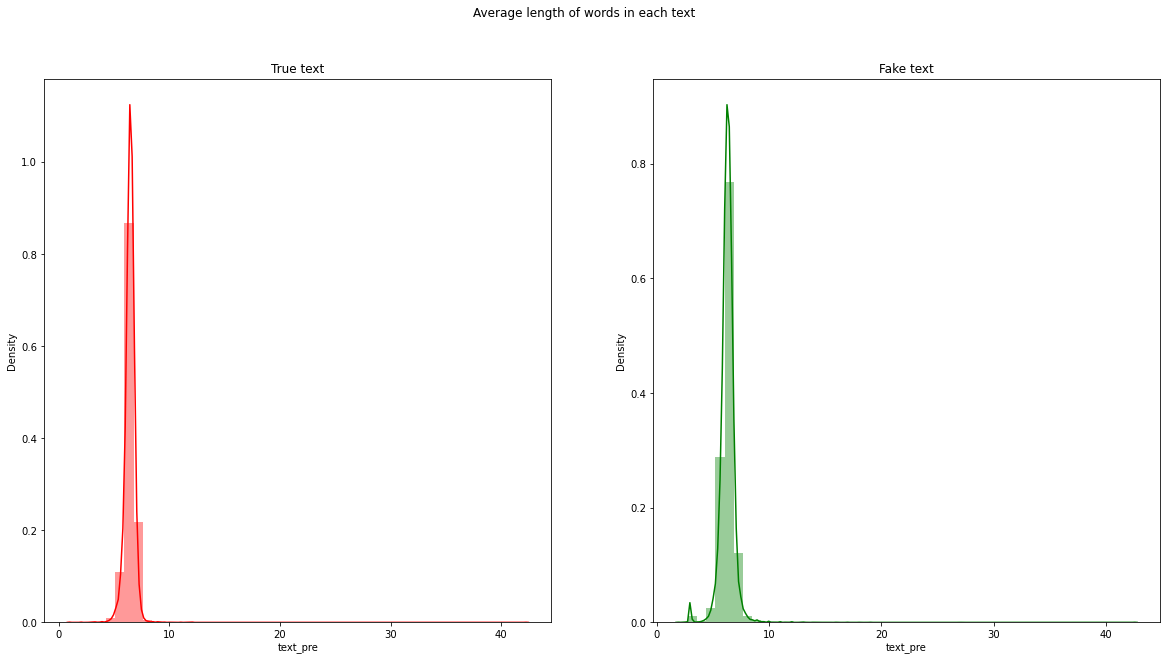

In [46]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

word1=news1[news1['category']==1]['text_pre'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('True text')

word2=news1[news1['category']==0]['text_pre'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word2.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average length of words in each text')

Splitting the data into 2 groups:

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(news1.text, news1.category, random_state = 0)

In [48]:
features_max = 8000
maxlen = 200

In [49]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence

tokenizer = Tokenizer(num_words=features_max)
tokenizer.fit_on_texts(x_train)

tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [50]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [51]:
EMBEDDING_FILE = 'D:/Twitter Glove file/glove.twitter.27B.100d.txt'

In [52]:
EMBEDDING_FILE

'D:/Twitter Glove file/glove.twitter.27B.100d.txt'

In [53]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding="utf8"))

In [54]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(features_max, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= features_max: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector


D:\InstalledConda\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [55]:
batch_size = 256
epochs = 10
embed_size = 100

In [58]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [62]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
import keras
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(features_max, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
245/245 [==============================] - 1214s 5s/step - loss: 0.3911 - accuracy: 0.8091 - val_loss: 0.1884 - val_accuracy: 0.9275
Epoch 2/10
245/245 [==============================] - 1334s 5s/step - loss: 0.1701 - accuracy: 0.9332 - val_loss: 0.1336 - val_accuracy: 0.9497
Epoch 3/10
245/245 [==============================] - 3878s 16s/step - loss: 0.1336 - accuracy: 0.9491 - val_loss: 0.1249 - val_accuracy: 0.9510
Epoch 4/10
245/245 [==============================] - 1416s 6s/step - loss: 0.1175 - accuracy: 0.9545 - val_loss: 0.1196 - val_accuracy: 0.9523
Epoch 5/10
245/245 [==============================] - 1318s 5s/step - loss: 0.1094 - accuracy: 0.9577 - val_loss: 0.1199 - val_accuracy: 0.9523
Epoch 6/10
245/245 [==============================] - 1312s 5s/step - loss: 0.1070 - accuracy: 0.9567 - val_loss: 0.1183 - val_accuracy: 0.9539
Epoch 7/10
245/245 [==============================] - 1422s 6s/step - loss: 0.1026 - accuracy: 0.9584 - val_loss: 0.1163 - val_accuracy

In [65]:
pred = model.predict_classes(X_test)
pred[:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [70]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1960/1960 [==============================] - 227s 116ms/step - loss: 0.0678 - accuracy: 0.9724
Accuracy of the model on Training Data is -  97.24481105804443 %
654/654 [==============================] - 71s 108ms/step - loss: 0.1103 - accuracy: 0.9556
Accuracy of the model on Testing Data is -  95.5565094947815 %


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
confusion_m = confusion_matrix(y_test,pred)
confusion_m

array([[12631,   470],
       [  459,  7347]], dtype=int64)

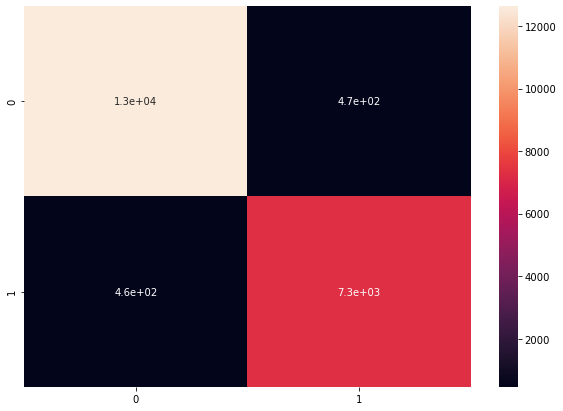

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
cfm = [[12631,   470],
       [459,  7347]]
classes = ["0", "1"]

df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")